<a href="https://colab.research.google.com/github/duchung2604/hung/blob/main/thuchanh3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
import pandas as pd # Import pandas here

# Kết nối Google Drive
drive.mount('/content/drive')

# Đường dẫn tệp Excel
file_path = '/content/drive/My Drive/finaca/financial_timeseries_dataset.csv'

# Đọc file Excel
df = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


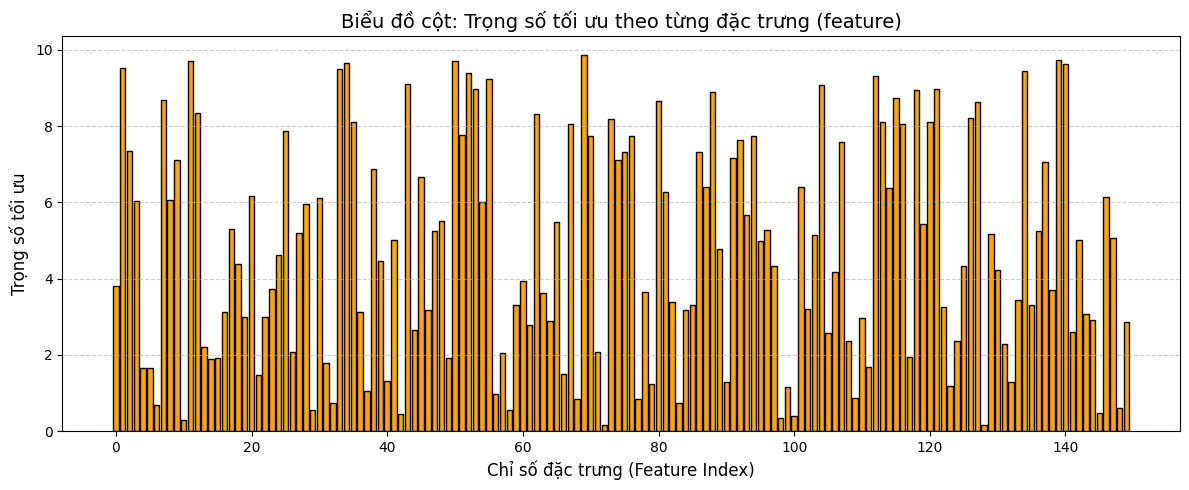

In [4]:
# === CÀI ĐẶT ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === GIẢ LẬP VECTƠ TRỌNG SỐ (thay bằng kết quả PSO thật nếu có) ===
# Giả sử bạn đã có 'best_weights_vector' từ thuật toán PSO
# Nếu bạn đã lưu file `.npy` hoặc `.csv`, hãy load vào thay vì sinh ngẫu nhiên như dưới đây
np.random.seed(42)
best_weights_vector = np.random.uniform(0.1, 10, size=150)  # thay bằng vector thực tế nếu bạn đã có

# === VẼ BIỂU ĐỒ CỘT ===
plt.figure(figsize=(12, 5))
plt.bar(range(len(best_weights_vector)), best_weights_vector, color='orange', edgecolor='black')
plt.title("Biểu đồ cột: Trọng số tối ưu theo từng đặc trưng (feature)", fontsize=14)
plt.xlabel("Chỉ số đặc trưng (Feature Index)", fontsize=12)
plt.ylabel("Trọng số tối ưu", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

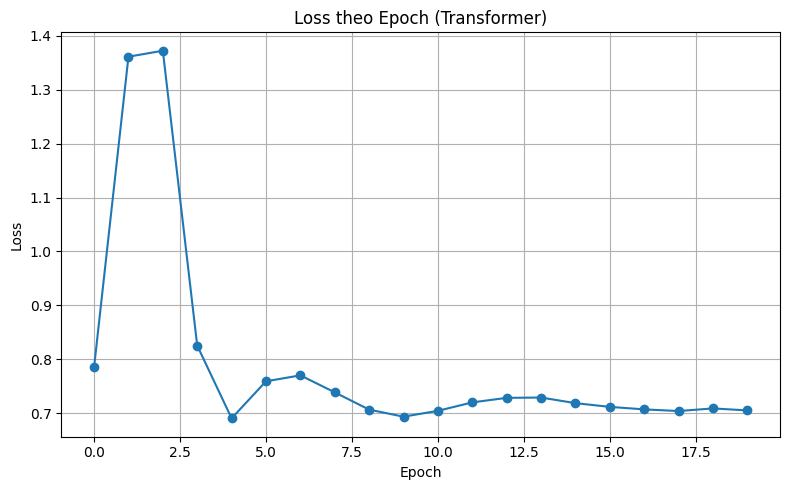

In [5]:
# CÀI ĐẶT
!pip install torch torchvision

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# GIẢ LẬP DỮ LIỆU (bạn thay bằng dữ liệu thật)
np.random.seed(42)
n_samples = 1000
top_n = 20
X = np.random.randn(n_samples, top_n)
y = np.random.randint(0, 2, size=n_samples)

# CHUẨN HÓA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# TÁCH TẬP DỮ LIỆU
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# CHUYỂN THÀNH TENSOR
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # [batch, seq_len=1, features]
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# MÔ HÌNH TRANSFORMER ĐƠN GIẢN
class SimpleTransformerClassifier(nn.Module):
    def __init__(self, input_dim, n_heads=2, hidden_dim=64, num_classes=2):
        super().__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=n_heads, batch_first=True),
            num_layers=1
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        return self.classifier(x)

# HUẤN LUYỆN
model = SimpleTransformerClassifier(input_dim=top_n)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

n_epochs = 20
train_losses = []
for epoch in range(n_epochs):
    model.train()
    logits = model(X_train_tensor)
    loss = loss_fn(logits, y_train_tensor)
    train_losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# ĐÁNH GIÁ
model.eval()
with torch.no_grad():
    test_logits = model(X_test_tensor)
    test_preds = torch.argmax(test_logits, dim=1)
    test_accuracy = (test_preds == y_test_tensor).float().mean().item()

print(f"🎯 Accuracy trên tập test: {test_accuracy:.4f}")

# VẼ BIỂU ĐỒ LOSS
plt.figure(figsize=(8, 5))
plt.plot(train_losses, marker='o')
plt.title("Loss theo Epoch (Transformer)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()
